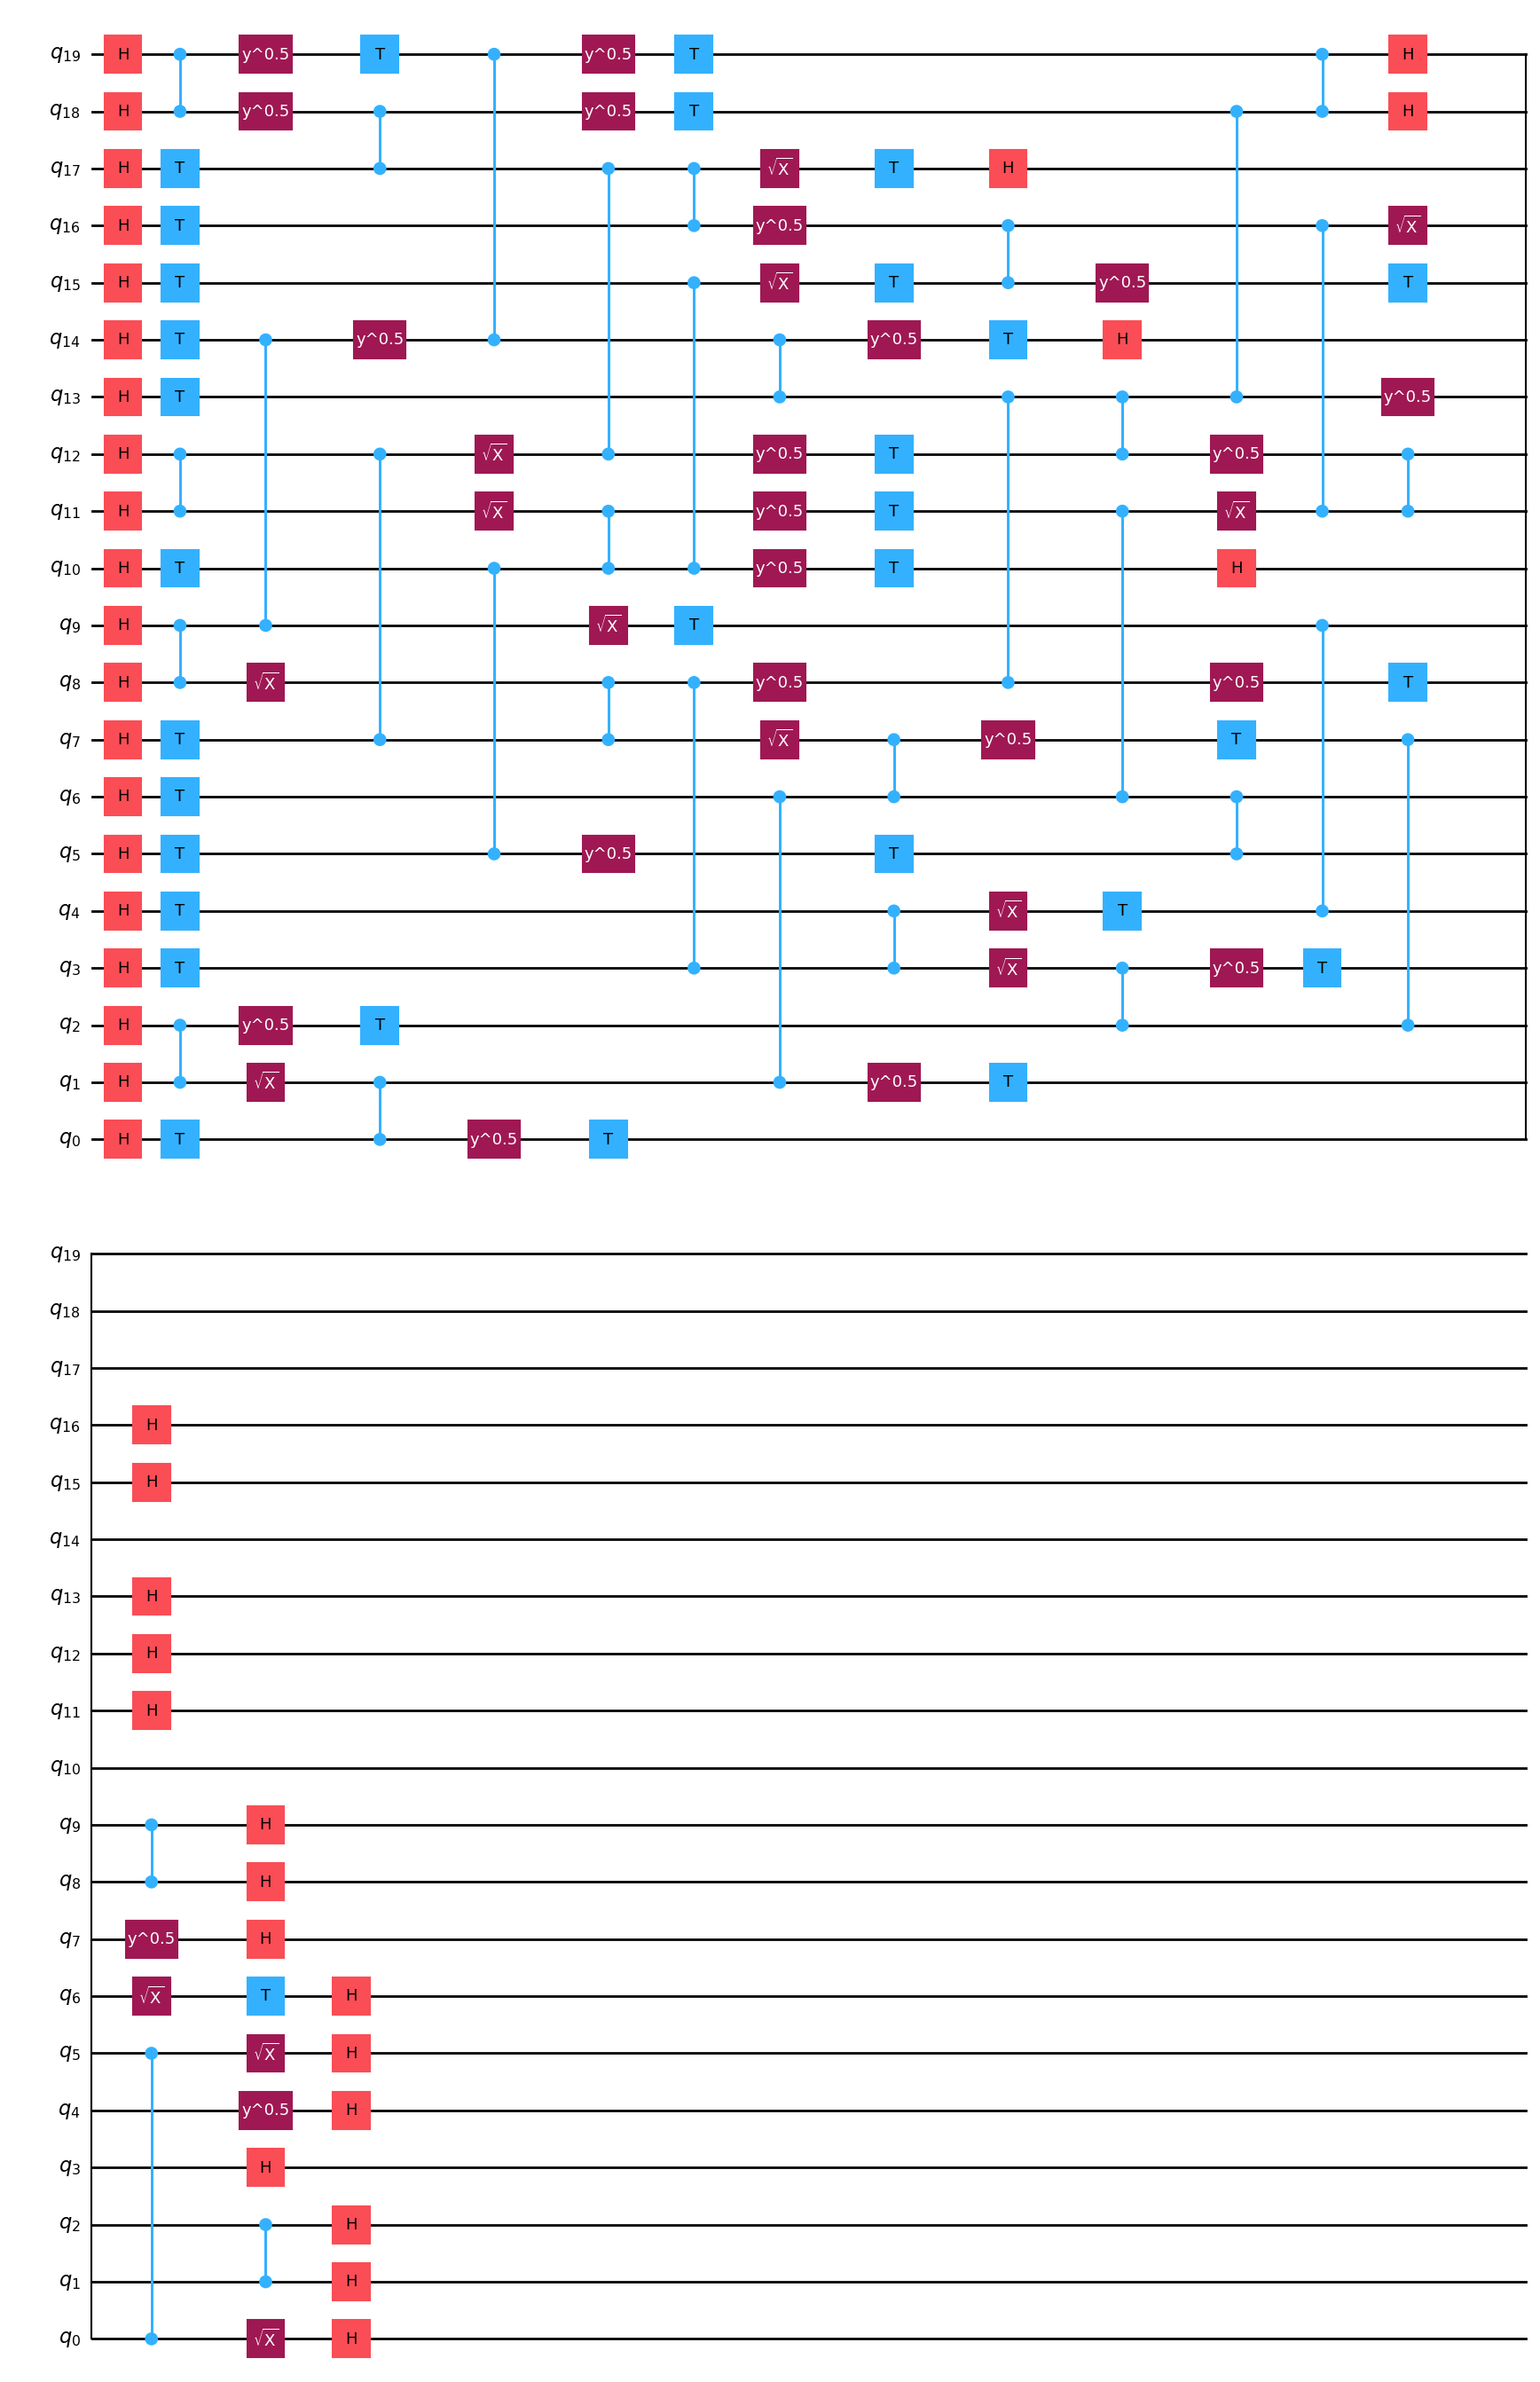

In [12]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate
from qiskit.quantum_info import Statevector

path = "GRCS/inst/rectangular/cz_v2/4x5/inst_4x5_10_0.txt"

with open(path, 'r') as file:
    nqubits = int(file.readline())

    qc = QuantumCircuit(nqubits)
    for line in file:
        cycle, gate, *qubits = line.split()
        target = nqubits - 1 - int(qubits[0])
        if len(qubits) > 1:
            control = nqubits - 1 - int(qubits[1])
        if gate == 'h':
            qc.h(target)
        elif gate == 'x':
            qc.x(target)
        elif gate == 'y':
            qc.y(target)
        elif gate == 'z':
            qc.z(target)
        elif gate == 't':
            qc.t(target)
        elif gate == "x_1_2":
            qc.sx(target)
        elif gate == "y_1_2":
            qc.append(YGate().power(1/2), [target])
        elif gate == 'cz':
            qc.cz(control, target)
        elif gate == 'cx':
            qc.cx(control, target)
     
# qc.measure_all()
qc.draw(output='mpl', reverse_bits=True)
# Circuits are inverse on qiskit

In [ ]:
from qiskit_aer import QasmSimulator, AerSimulator, StatevectorSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import time 

simulator = QasmSimulator()
simulator = AerSimulator(method="statevector")
# simulator = StatevectorSimulator()
circ = transpile(qc, simulator)
start = time.time()
result = simulator.run(circ, shots=1e6).result()
end = time.time()
print("Time taken: ", end-start)

counts = result.get_counts()
counts_ordered = sorted(counts.items(), key=lambda x: x[1], reverse=True)
print(counts_ordered)
# plot_histogram(result.get_counts(), figsize=(10, 5))

In [13]:
import time 
start = time.time()
sv = Statevector.from_instruction(qc)
bits = sv.probabilities_dict().keys()
print(time.time() - start)
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)

33.137653827667236
('00000000000000000000', (0.002327019826316337-0.0023862037810349758j))
('00000000000000000001', (-5.3405761718752494e-05-0.0015318431543771321j))
('00000000000000000010', (-0.0006226362080022138+0.0011886134280345102j))
('00000000000000000011', (0.0019042429284100533+0.0008866363787505777j))
('00000000000000000100', (0.0009208563599383119-0.0018946693047838103j))
('00000000000000000101', (-0.0018011338080352872-0.00027890281056292454j))
('00000000000000000110', (-0.000531532650438784-0.002553601283910906j))
('00000000000000000111', (-0.0003681551665949894+0.0028673978408789162j))
('00000000000000001000', (-1.5351816626128853e-05-0.001122791459971391j))
('00000000000000001001', (-0.00014387408734336206-0.0005794778351270583j))
('00000000000000001010', (0.001331945311002678-0.0002933948068444501j))
('00000000000000001011', (-0.0010938074674083453-0.0011335810531901765j))
('00000000000000001100', (0.0003726243624387052+0.001013361942221544j))
('00000000000000001101', (

In [15]:
prob = np.abs(sv.data**2)
print(prob)
sorted_idx = np.argsort(prob)
for i in sorted_idx[::-1][:20]:
    print(f"{i:b}: {prob[i]}, {sv.data[i]}")

[1.11089898e-05 2.34939562e-06 1.80047773e-06 ... 3.10616783e-07
 1.68989565e-07 4.30106654e-08]
10110110100011100011: 5.7211993932703636e-05, (-0.003087658901098403-0.006904951588763779j)
11110100000111111111: 5.5071304496562305e-05, (0.005898266193165246+0.004503527551944837j)
10101000111011111110: 5.4985630731346034e-05, (-0.007124259801075028-0.00205683081903506j)
11110100000110111000: 5.41585378861319e-05, (-0.0069594802925114435-0.0023925241784100606j)
10110110100010100100: 5.240773754036045e-05, (0.004775118583945919+0.005441137753229078j)
10110110101111111111: 5.134477386528436e-05, (-0.004686819075822082-0.005420193798730319j)
10111001011000011011: 5.016469829019901e-05, (-0.006683923735763313+0.002343045408159819j)
11111011111101000000: 4.825811603402515e-05, (-0.006429442694356095-0.0026306620220043837j)
11111011111100000111: 4.8193170597513564e-05, (-0.0068859903966385465-0.0008810827741564774j)
10111001010001000000: 4.748499573403759e-05, (-0.0054645681411980215-0.00419803

## Other

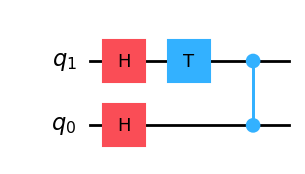

In [52]:
n = 2
qc1 = QuantumCircuit(n)
for i in range(n):
    qc1.h(i)

qc1.t(1)
# qc1.z(0)
qc1.cz(0, 1)

# qc1.append(YGate().power(1/2), [1])
qc1.draw(output='mpl', reverse_bits=True)

In [53]:

sv = Statevector.from_instruction(qc1)
bits = sv.probabilities_dict().keys()
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)

(np.str_('00'), np.complex128(0.4999999999999999+0j))
(np.str_('01'), np.complex128(0.4999999999999999+0j))
(np.str_('10'), np.complex128(0.3535533905932737+0.3535533905932737j))
(np.str_('11'), np.complex128(-0.3535533905932737-0.3535533905932737j))


In [60]:
n = 1
qc2 = QuantumCircuit(n)
for i in range(n):
    qc2.h(i)

qc2.z(0)
# qc2.z(0)
# qc2.cz(0, 2)

sv = Statevector.from_instruction(qc2)
bits = sv.probabilities_dict().keys()
l = list(zip(bits, sv.data))
for i in l[:20]:
    print(i)


(np.str_('0'), np.complex128(0.7071067811865475+0j))
(np.str_('1'), np.complex128(-0.7071067811865475+0j))
